In [483]:
import threading
threading.active_count()

7

In [484]:
from covariant_integrator_library import *
from bunch_inits import *
from plotting_variables import *
from integrator_wrappers import *
from numba_optimized_integrator import *
%load_ext autoreload
%autoreload 2

font_size = 16
# Update the rcParams dictionary to set the font size globally
plt.rcParams.update({'font.size': font_size})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Critical variables for this test:
#### note that the macroparticle count is not implemented yet as a variable.

In [485]:
c_ms = 299792458

transv_dist = 2e-4 # intrabunch size limit
transv_offset = 8e-2 # offset between rider/driver


m_particle_rider = 1.007319468  #proton -amu
m_particle_driver = 207.2 #lead, amu
#m_particle_driver = 0.0005485   #electron -amu
#m_particle = 315 #gold hexafloride, amu

stripped_ions_rider = 1.
stripped_ions_driver = 54.
charge_sign_rider= -1.
charge_sign_driver = 1.

starting_Pz_rider = 1.01e6   #3.25E5 corresponds to 1 TeV
starting_Pz_driver = -starting_Pz_rider/m_particle_driver*m_particle_rider  #actually velocity-like, mass factored later
transv_mom_rider = 0. #1e-6   #1e-2 is roughly 10keV scale
transv_mom_driver = transv_mom_rider#*207 # lazy adding lead mass
starting_distance_rider = 1e-6
starting_distance_driver = 1000.

sim_type = 2    # type 2 used here, it is for bunch--bunch simulations
pcount_rider = 5    #bunch populations
pcount_driver = 5



#### Beam inits

In [486]:
init_rider, E_MeV_rest_rider = init_bunch(starting_distance_rider,transv_mom_rider,starting_Pz_rider,stripped_ions_rider,m_particle_rider,transv_dist,pcount_rider,charge_sign_rider)

E_MeV =  3161419.9768265886
Gamma =  3368.997714792518
E_rest =  938.385948501337


In [487]:
init_driver, E_MeV_rest_driver = init_bunch(starting_distance_driver,transv_mom_driver,starting_Pz_driver,stripped_ions_driver,m_particle_driver,transv_dist-transv_offset,pcount_driver,charge_sign_driver)


E_MeV =  -3161361.621250385
Gamma =  16.408850063482863
E_rest =  193020.75925874696


#### Function call 

In [488]:
#### parameters not used in this test, but required to run integrator
bunch_dist = 1E5   #bunch--bunch distance at which the driver bunch has maximum charge (gaussian mean)
cav_spacing = 1E5  #distance to the subsequent driver bunch
aperture = 1E5 #this parameter reused for bunch-driven gaussian sigma
z_cutoff = 0
wall_pos= 1E5
steps = 4500
step_size = 2.2e-7


In [489]:
# # In your notebook, replace the integrator call with:

# # For maximum performance (Numba-optimized)
# retarded_traj, retarded_drv_traj = retarded_integrator(
#     steps, step_size, wall_pos, aperture, sim_type, 
#     init_rider, init_driver, bunch_dist, cav_spacing, z_cutoff
# )

# # To benchmark both versions
# retarded_traj, retarded_drv_traj = retarded_integrator(
#     steps, step_size, wall_pos, aperture, sim_type, 
#     init_rider, init_driver, bunch_dist, cav_spacing, z_cutoff,
#     benchmark=True
# )

# # To use original version
# retarded_traj, retarded_drv_traj = retarded_integrator(
#     steps, step_size, wall_pos, aperture, sim_type, 
#     init_rider, init_driver, bunch_dist, cav_spacing, z_cutoff,
#     use_numba=False
# )

In [490]:
retarded_traj,retarded_drv_traj = retarded_integrator(steps,step_size,wall_pos,aperture,sim_type,init_rider,init_driver,bunch_dist,cav_spacing,z_cutoff)


Starting Numba-optimized retarded integration (4500 steps)...
  Step 0/4500 (0%)


  Step 450/4500 (10%)
  Step 900/4500 (20%)
  Step 1350/4500 (30%)
  Step 1800/4500 (40%)
  Step 2250/4500 (50%)
  Step 2700/4500 (60%)
  Step 3150/4500 (70%)
  Step 3600/4500 (80%)
  Step 4050/4500 (90%)
Numba-optimized integration completed!


### Calculate plotting variables
#### note that these are only reading the first particle from each trajectory for most parameters. (longitudinal and transverse diplacement takes a mean)

In [491]:
delta_e, delta_e_drv, tot_e, tot_e_drv, delta_e_keV, delta_e_MeV, tot_e_GeV, delta_e_keV_drv, delta_e_MeV_drv, tot_e_GeV_drv, zs, xs, zs_drv, xs_drv, bzs, bxs, bys, bdotxs, bdotys, bdotzs, Pzs, Pxs, Pys, Pts, gammas, tees, bzs_drv, bxs_drv, bys_drv, bdotxs_drv, bdotys_drv, bdotzs_drv, Pzs_drv, Pxs_drv, Pys_drv, Pts_drv, gammas_drv, tees_drv, qs_drv, gam_fixed, bdotzs_seconds, q_statC_squared, q_kg_m3_sneg2, Pows_z_rider_watts = calculate_plotting_variables(retarded_traj,
retarded_drv_traj, init_rider, init_driver, steps, E_MeV_rest_rider, E_MeV_rest_driver, c_ms)

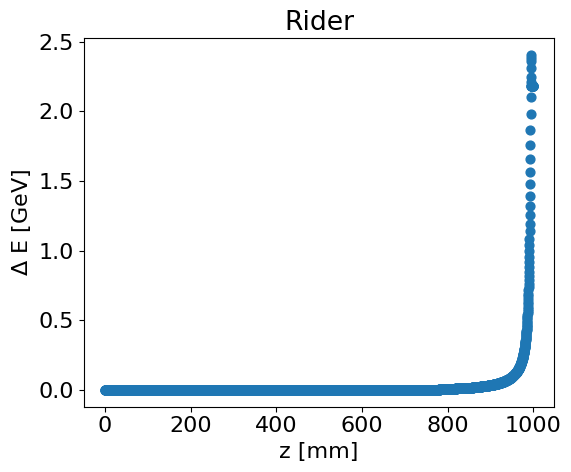

In [499]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,delta_e_MeV/1000,s=40)
#ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(starting_distance_rider/2,3)
#plt.ylim(1E-2,2e3)
#plt.xscale('log')  #log scale works at 1mm range
#plt.yscale('log')
plt.title("Rider")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

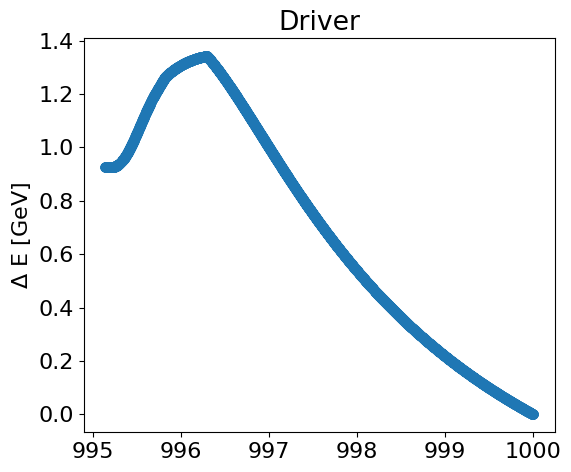

In [493]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



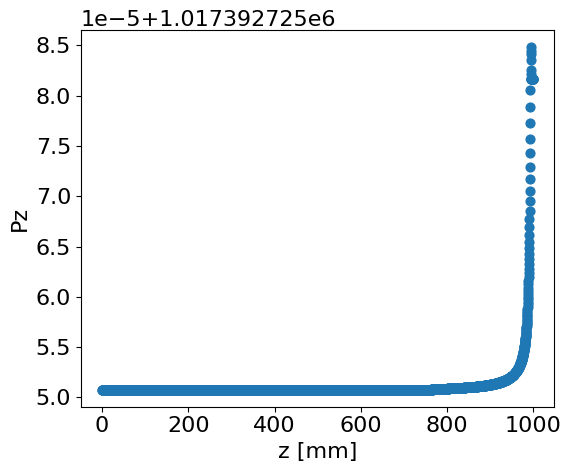

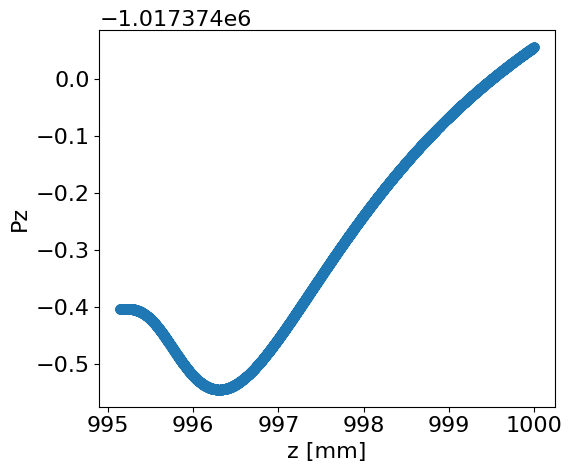

In [494]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pzs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pz")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pzs_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pz")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

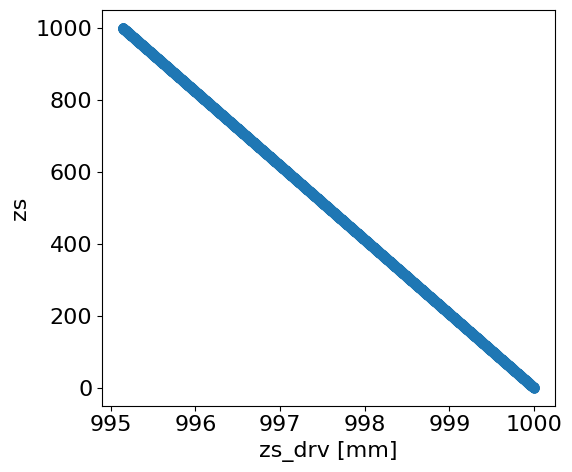

In [495]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,zs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"zs")
ax.set_xlabel(r"zs_drv [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.ylim(2E-2,5)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

### Various other plots

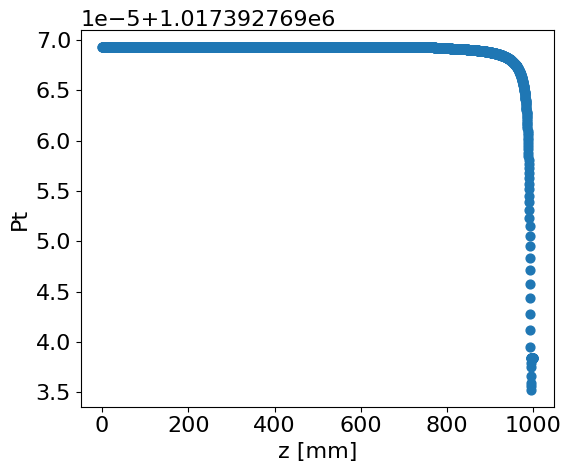

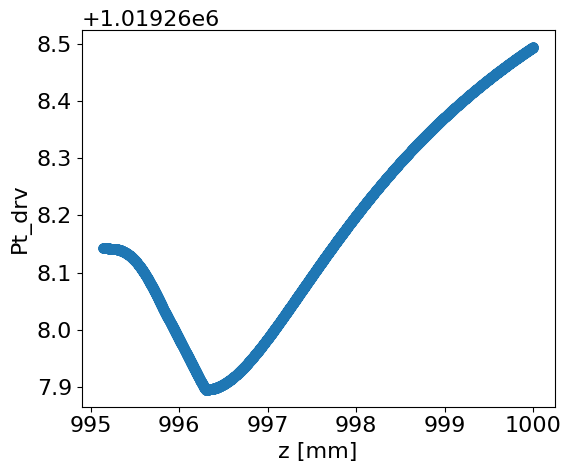

In [496]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pts,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pt")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pts_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pt_drv")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

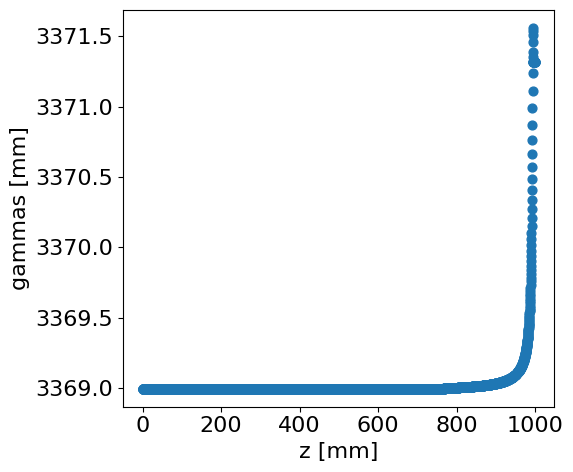

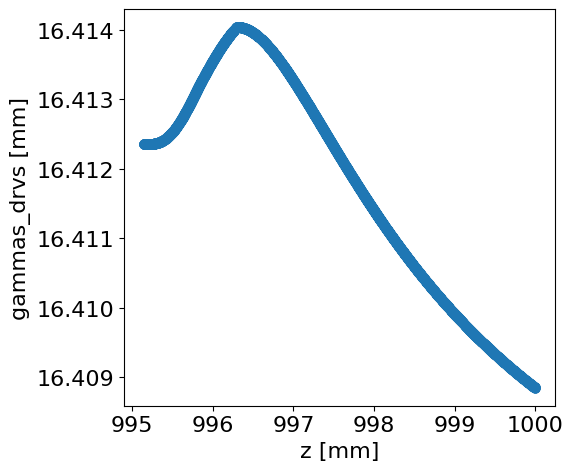

In [497]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,gammas,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"gammas [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,gammas_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"gammas_drvs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

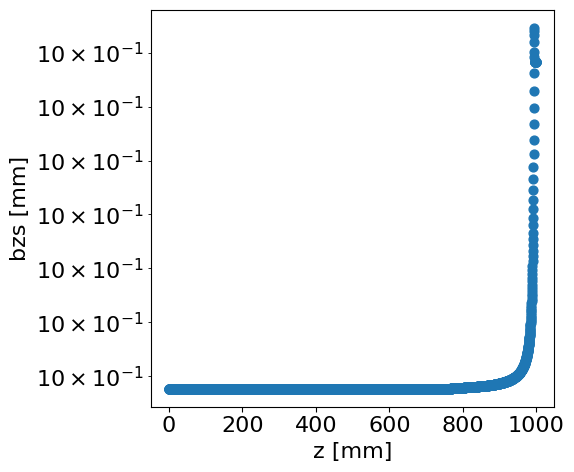

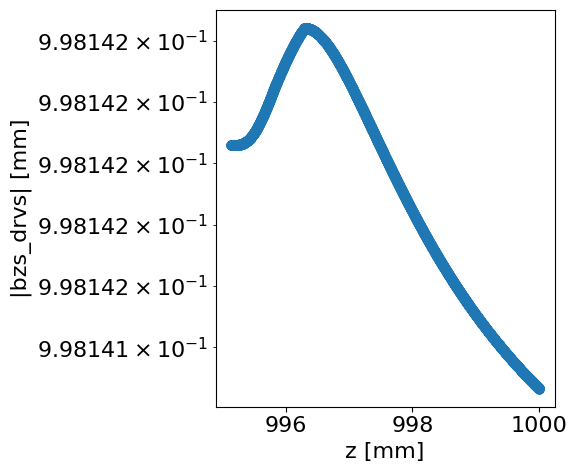

In [498]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,bzs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"bzs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,np.abs(bzs_drv),s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"|bzs_drvs| [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()